## **Predicción de sobrevivientes del naufragio del titanic utilizando Machine Learning**

En este notebook se realiza el análisis del dataset del titanic, con el objetivo de utilizar técnicas de machine learning y aplicando feature engineering para predecir si un determinado pasajero sobrevivirá o no al naufragio del titanic. 

Dataset disponible en: https://www.kaggle.com/c/titanic

### **1. Importación de librerias y de los datos**

In [325]:
# importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# herramientas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import xgboost as xgb
# escalamiento y normalizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
# imputers
from sklearn.impute import SimpleImputer
# metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
# mejoras
from sklearn.model_selection import GridSearchCV
# reduccion
from sklearn.decomposition import PCA

In [370]:
# datos y conversion a dataframe
df = pd.read_csv('train.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### **2. Exploración y limpieza de los datos**

En esta sección se realiza un análisis exploratorio del set de datos con el objetivo de comprenderlos. En el análisis se busca identificar datos faltantes, duplicados, outliers, inconsistencia en datos categóricos y se de ser necesario se aplican técnica de imputación para los datos faltantes y outliers.

In [371]:
# df
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Las primeras 10 filas del dataset se visualizan. Inicialmente se observa que PassengerId es un identificador del pasajero, survived es una variable binaria, con 1 representando que sobrevivio y 0 que no, pclass es la clase en la que el pasajero iba a bordo, el nombre del pasajero, el sexo, la edad, SibSp siendo la cantidad de familia a bordo que tenia el pasajero, parch representa si el pasajero era padre de cierta cantidad de de niños, el numero de ticket, fare siendo el costo del ticket, cabin es el número de la cabina y embarked siendo el puerto donde abordó el barco.

In [372]:
# tipo de datos
print("Tipos de datos del dataframe")
df.dtypes

Tipos de datos del dataframe


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Los datos disponibles en el dataset son del tipo numérico y object.

In [373]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [374]:
# df
df.shape

(891, 12)

El dataset contiene 891 filas y 12 columnas de datos.

In [375]:
# estadisticas
print("Estadistica descriptiva del dataset")
df.describe()

Estadistica descriptiva del dataset


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A continuación se busca identificar datos faltantes en el dataframe.

In [376]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Cabin,204,687,77.10
Age,714,177,19.87
Embarked,889,2,0.22
PassengerId,891,0,0.00
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
SibSp,891,0,0.00
Parch,891,0,0.00


Se observa que el dataset contiene faltantes en cabin y age. 

In [377]:
# duplicados
df.duplicated().sum()

0

El dataset no contiene datos duplicados.

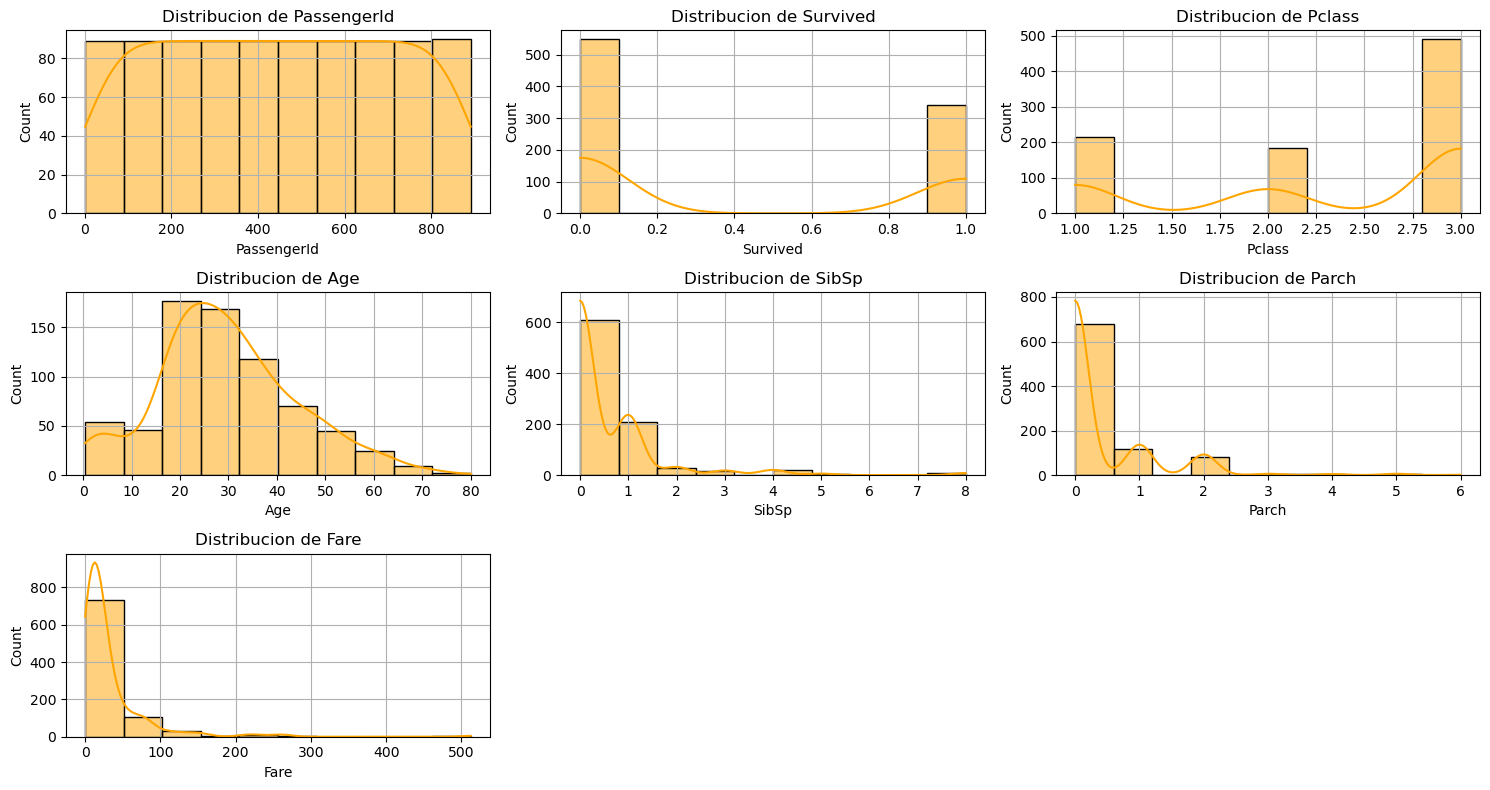

In [378]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="orange", bins=10)  
    plt.title(f"Distribucion de {col}")
    plt.tight_layout()
    plt.grid()

plt.show()

Se observa la distribucion de los datos, en ellos se puede notar que la mayoria de las variables presentan una distribución de datos agrupada hacia los valores menores.

Se procede a analizar detenidamente los datos faltantes con el objetivo de completarlos utilizando alguna técnica de imputación.

In [379]:
# faltantes en cabin
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [380]:
# unicos en cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Los datos de la columna Cabin, hacen referencia a la cabina en la cual el pasajero se encontraba. Debido a que el porcentaje de datos faltantes en esta columna es cerca del 77%, se procede a transformar esta variable en una variable binaria, para poder identificar si hay una relacion entre un pasajero que tiene cabina o no y sus chances de sobrevivir. 

In [382]:
# df modificado
df_modified = df.copy()

In [383]:
# agregar has_cabin
df_modified['Has_Cabin'] = df_modified['Cabin'].notna().astype(int)

# resultados
df_modified.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


Una vez agregada la columna Has_Cabin, se procede a verificar si existe una correlación con que el pasajero sobreviva.

In [384]:
# tabla de contingencia
contingency_table = pd.crosstab(df_modified['Has_Cabin'], df_modified['Survived'])
print(contingency_table)

Survived     0    1
Has_Cabin          
0          481  206
1           68  136


Con la tabla de contingencia se visualiza que 481 personas que no tenian cabina no sobrevivieron al naufragio, en contraposición a 68 personas que si tenian cabina.

In [385]:
# proporcion
survival_rate_with_cabin = df_modified[df_modified['Has_Cabin'] == 1]['Survived'].mean()
survival_rate_without_cabin = df_modified[df_modified['Has_Cabin'] == 0]['Survived'].mean()

print(f"Tasa de supervivencia con cabina: {survival_rate_with_cabin:.2%}")
print(f"Tasa de supervivencia sin cabina: {survival_rate_without_cabin:.2%}")

Tasa de supervivencia con cabina: 66.67%
Tasa de supervivencia sin cabina: 29.99%


Asi tambien se visualiza que una persona con cabina tiene 66% más chances de sobrevivir.

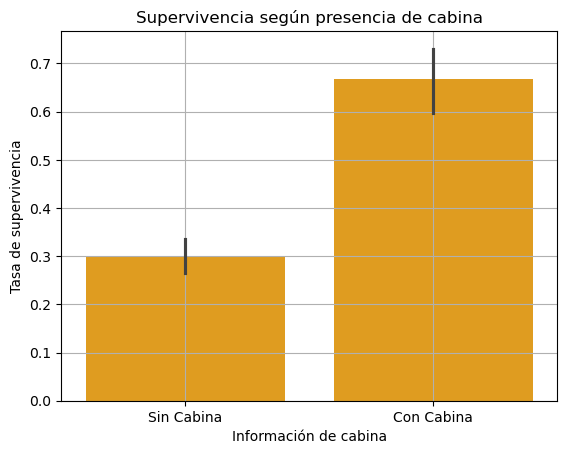

In [386]:
# grafico de barras por cabina
sns.barplot(x='Has_Cabin', y='Survived', data=df_modified, color='orange')

# configuraciones de grafico
plt.xticks([0, 1], ['Sin Cabina', 'Con Cabina'])
plt.title('Supervivencia según presencia de cabina')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Información de cabina')
plt.grid()
plt.show()

Por lo tanto, segun estos datos, si hay una relacion entre la posibilidad de que un pasajero sobreviva al naufragio asociada a si tiene cabina o no. Siendo asi, los datos faltantes que son el 77% no se eliminaran, sin emabrgo al tratarse de un dato categorico que representa el lugar donde estaba hospedada la persona tampoco es posible imputar por la media, por esta razón se toma la decisión de rellenar los datos faltantes con "Uknown" haciendo referencia a que ese dato es desconocido.

In [387]:
# rellenar con unknown
df['Cabin'] = df['Cabin'].fillna('unknown')

# resultado
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [388]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Age,714,177,19.87
Embarked,889,2,0.22
PassengerId,891,0,0.00
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
SibSp,891,0,0.00
Parch,891,0,0.00
Ticket,891,0,0.00


Posteriormente se proecede a analizar la variable Age, que representa la edad de los pasajeros y se busca tambien rellenar los datos faltantes.

In [389]:
# faltantes en age
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,unknown,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,unknown,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,unknown,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,unknown,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,unknown,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,unknown,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,unknown,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,unknown,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,unknown,S


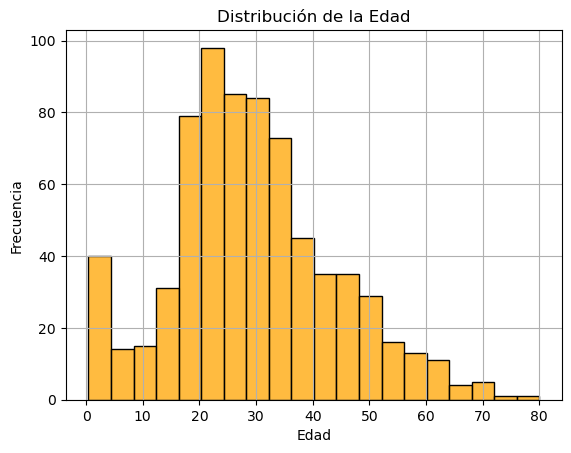

In [390]:
# histograma de age
sns.histplot(df['Age'], bins=20, kde=False, color='orange')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

Se observa que hay edades cercanas a 0, lo que puede estar asociado a que son bebes o se trata de un error, se procede a verificar.

In [391]:
# edad de 0
df[df['Age'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [392]:
# edad de 1
df[df['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,unknown,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,unknown,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,unknown,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,unknown,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,unknown,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,unknown,S


Efectivamente, las edades están representadas en decimales porque hacen referencia a niños, lo que se puede verificar en las palabras Master y Miss que anteriormente se utilizaban en pequeños.

A continuación se rellenaran los datos faltantes utilizando un modelo de regresión lineal, siendo el conjunto de datos de entrenamiento los que no son Nan, y los datos de test los que sn Nan.

In [393]:
# datos completos para train
train_data = df[df['Age'].notna()]

# datos faltantes para test
test_data = df[df['Age'].isna()]

# features para el modelo
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']

# codificar las categoricas
x_train = pd.get_dummies(train_data[features], drop_first=True)
y_train = train_data['Age']
x_test = pd.get_dummies(test_data[features], drop_first=True)

# ajustar
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [394]:
# crear modelo
regressor = LinearRegression(positive=True)

# entrenar el modelo
regressor.fit(x_train, y_train)

LinearRegression(positive=True)

In [395]:
# predecir
predicted_ages = regressor.predict(x_test)

# predicciones mayores a 0
predicted_ages = np.maximum(predicted_ages, 0)

# rellenar faltantes
df.loc[df['Age'].isna(), 'Age'] = predicted_ages

In [396]:
# predicciones 
print("Primeras predicciones de edades:", predicted_ages[:5])

# resultados
print("Faltantes después del proceso", df['Age'].isna().sum())

Primeras predicciones de edades: [30.1207832  30.26706508 26.61584112 30.08106031 26.636912  ]
Faltantes después del proceso 0


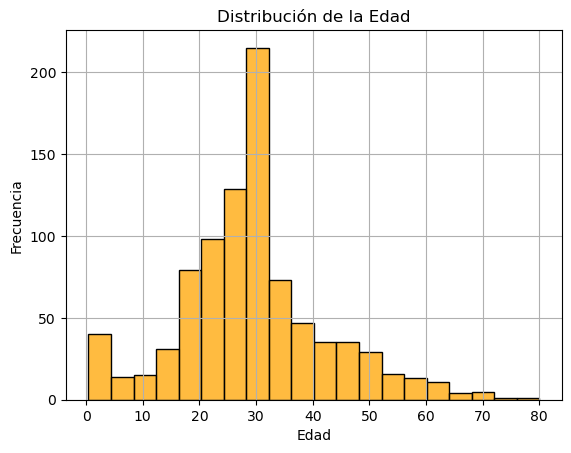

In [397]:
# histograma de age
sns.histplot(df['Age'], bins=20, kde=False, color='orange')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

In [398]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Embarked,889,2,0.22
PassengerId,891,0,0.00
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
Age,891,0,0.00
SibSp,891,0,0.00
Parch,891,0,0.00
Ticket,891,0,0.00


Por ultimo, la columna de embarked tiene 0.22% de datos faltantes y al no ser representativo se procede a eliminar.

In [399]:
# faltantes en embarked
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [400]:
# eliminar filas faltantes de embarked
df = df.dropna(subset=['Embarked'])

# resultado
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Se procede a realizar la codificacion de variables categoricas a tipo binarias.

In [401]:
# datos
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [402]:
# convertir 
df.loc[:, 'Sex'] = df['Sex'].map({'male': 1, 'female': 0}).astype(int)

In [403]:
# datos
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [408]:
# df
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,unknown,S


A continuación, se procede a visualizar outliers en los datos utilizando boxplots.

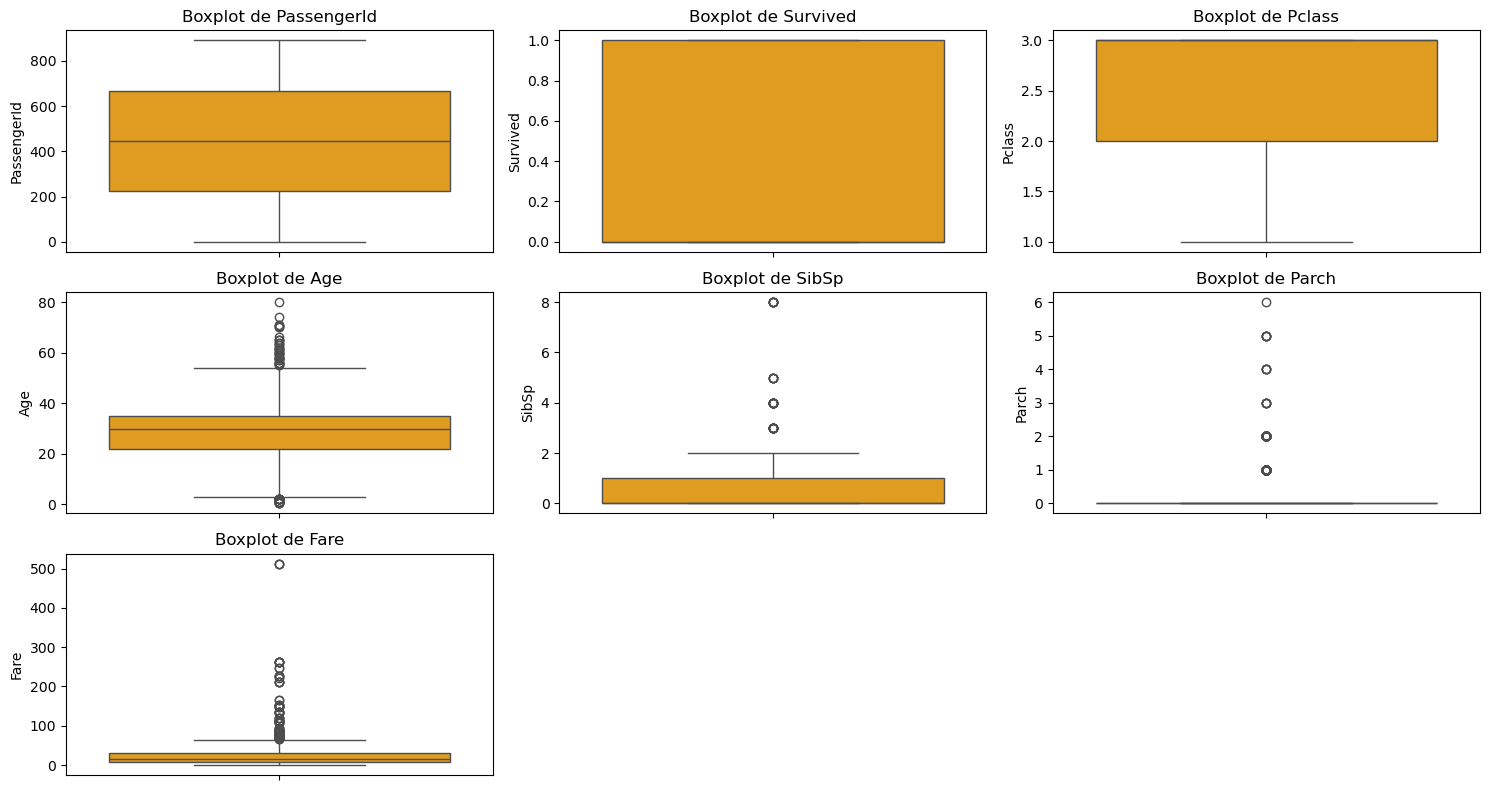

In [409]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

En los boxplots se logra visualizar que en el set de datos hay outliers en los datos.

In [410]:
# estadisticas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.618668,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.992205,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


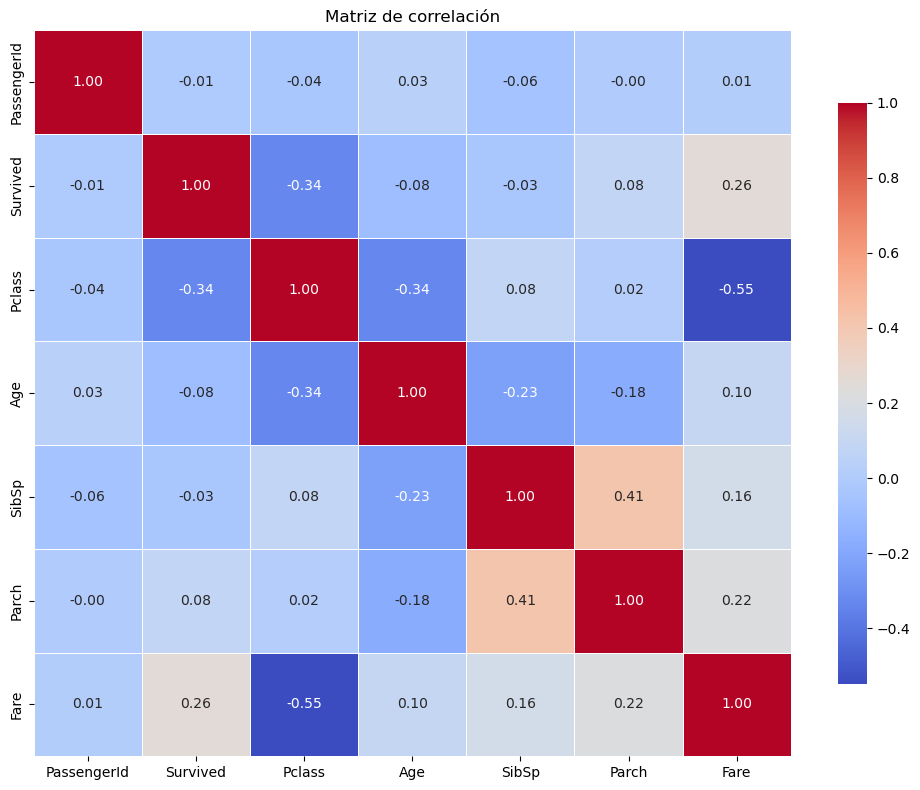

In [411]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Matriz de correlación')

# grafico
plt.tight_layout()
plt.show()

Se observan correlaciones entre las variables. 

### **3. Preprocesamiento de los datos**

Inicialmente se realizará le predicción utilizando el dataset original asi como se encuentra. Se eligen como variable target a survived y las demas columnas seran utlilizadas como predictoras.

In [412]:
# variables categoricas y target
x = df.drop(columns=['Survived'])  
y = df[['Survived']]

Se divide en train y test.

In [413]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [414]:
# extraer columnas
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

# verificar
print("Features numericas: ", numerical_features)
print("Features categoricas: ", categorical_features)

Features numericas:  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Features categoricas:  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


Se escalan los datos respectivamente.

In [415]:
# transformadores para cada subconjunto de columnas
# numerico
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# categorico
categoric_transformer =  Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

Se crea el ColumnTransformer

In [416]:
# crear columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),  
        ('cat', categoric_transformer, categorical_features)  
    ]
)

### **4. Aplicación de modelos**

### **Modelo Random Forest Classifier**

Se aplica el modelo random forest classifier para la prediccion de supervivencia del titanic.

In [417]:
# pipeline 
model_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', RandomForestClassifier(
    criterion="gini",
    n_estimators=100,
    max_depth=15,
    random_state=42
)
)])

In [418]:
# ajustar a los datos 
model_forest.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=15, random_state=42))])

In [419]:
# realizar predicciones
y_pred = model_forest.predict(x_test)

In [420]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.8089887640449438
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       167
           1       0.81      0.64      0.72       100

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [421]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[152  15]
 [ 36  64]]


In [422]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

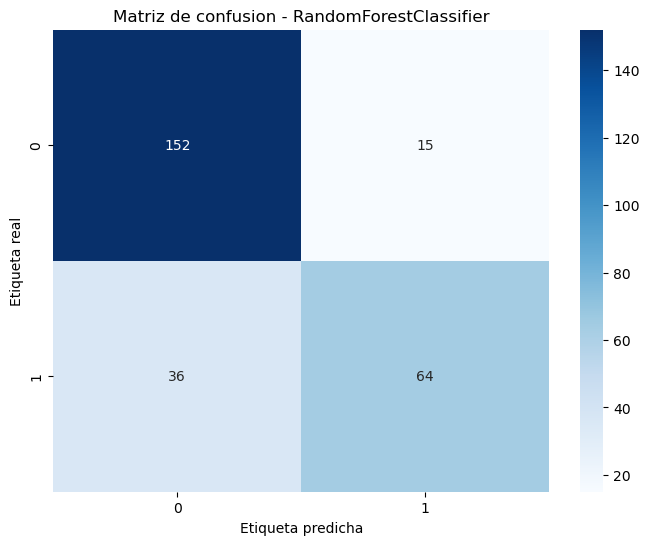

In [423]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - RandomForestClassifier")

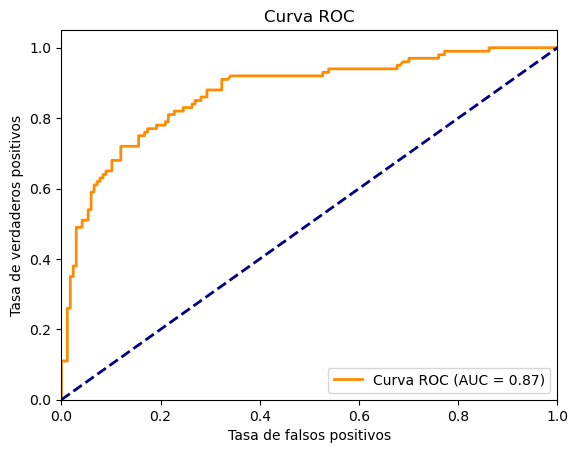

In [424]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_forest.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

A continuación se aplica ingeniería de características, con el objetivo de ver si el rendimiento del modelo mejora.

In [425]:
# df modificado
df_modified.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [426]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Cabin,204,687,77.10
Age,714,177,19.87
Embarked,889,2,0.22
PassengerId,891,0,0.00
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
SibSp,891,0,0.00
Parch,891,0,0.00


Se aplicaran las mismas condiciones que se aplicaron anteriormente para limpiar el dataset.

In [427]:
# rellenar cabinas faltantes con unknown
df_modified['Cabin'] = df_modified['Cabin'].fillna('unknown')

# resultado
df_modified[df_modified['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin


In [428]:
# rellenar los faltantes en edad con regresion lineal
# datos completos para train
train_data_modified = df_modified[df_modified['Age'].notna()]

# datos faltantes para test
test_data_modified = df_modified[df_modified['Age'].isna()]

# features para el modelo
features_modified = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare','Has_Cabin']

# codificar las categoricas
x_train_modified = pd.get_dummies(train_data_modified[features_modified], drop_first=True)
y_train_modified = train_data_modified['Age']
x_test_modified = pd.get_dummies(test_data_modified[features_modified], drop_first=True)

# ajustar
x_test_modified = x_test_modified.reindex(columns=x_train_modified.columns, fill_value=0)

In [429]:
# crear modelo
regressor = LinearRegression(positive=True)

# entrenar el modelo
regressor.fit(x_train_modified, y_train_modified)

LinearRegression(positive=True)

In [430]:
# predecir
predicted_ages_modified = regressor.predict(x_test_modified)

# predicciones mayores a 0
predicted_ages_modified = np.maximum(predicted_ages_modified, 0)

# rellenar faltantes
df_modified.loc[df_modified['Age'].isna(), 'Age'] = predicted_ages_modified

In [431]:
# eliminar faltantes en embarked
df_modified = df_modified.dropna(subset=['Embarked'])

# resultado
df_modified[df_modified['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin


In [432]:
# sex a binario
df_modified.loc[:, 'Sex'] = df_modified['Sex'].map({'male': 1, 'female': 0}).astype(int)

In [433]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
PassengerId,889,0,0.0
Survived,889,0,0.0
Pclass,889,0,0.0
Name,889,0,0.0
Sex,889,0,0.0
Age,889,0,0.0
SibSp,889,0,0.0
Parch,889,0,0.0
Ticket,889,0,0.0
Fare,889,0,0.0


Una vez limpio el dataset aplicando los criterios correspondientes, se procede a crear nuevas columnas para mejorar el rendimiento del modelo.

In [434]:
#df
df_modified.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,unknown,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,unknown,S,0


Se agregara la columna Family_Size, la cual estaria usando las variables SibSp y Parch ya que estas darian representacion de la cantidad de personas asociadas a un pasajero.

In [435]:
# tamaño de la familia
df_modified['Family_Size'] = df_modified['SibSp'] + df_modified['Parch'] + 1  

Tambien se agrega la columna del precio del boleto por persona. 

In [436]:
# precio del boleto por persona
df_modified['Fare_Per_Person'] = df_modified['Fare'] / df_modified['Family_Size']

Otra columna es la de identificar si embarco en un puerto comun 

In [437]:
# embarcó en el puerto más común
most_common_embarked = df_modified['Embarked'].mode()[0]
df_modified['Embarked_Common'] = (df_modified['Embarked'] == most_common_embarked).astype(int)

In [438]:
# df
df_modified.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Family_Size,Fare_Per_Person,Embarked_Common
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,unknown,S,0,2,3.62500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,2,35.64165,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,0,1,7.92500,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,2,26.55000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,unknown,S,0,1,8.05000,1


A continuacion se agrega la columna Family_Survived, que hace referencia a si algun familiar sobrevivio.

In [439]:
# indicar si algún familiar sobrevivió
family = df_modified.groupby(['Ticket'])['Survived'].transform('max')
df_modified['Family_Survived'] = family

Por ultimo se agrea la columna de Evacuation_Priority, que considera si es mujer y menor de edad, ya que estas personas tendrian mayor probabilidad de ser evacuadas.

In [440]:
# prioridad de evacuacion
df_modified['Evacuation_Priority'] = ((df_modified['Sex'] == 0) & (df_modified['Age'] < 18)).astype(int)

In [441]:
# df
df_modified.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Family_Size,Fare_Per_Person,Embarked_Common,Family_Survived,Evacuation_Priority
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,unknown,S,0,2,3.62500,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,2,35.64165,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,0,1,7.92500,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,2,26.55000,1,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,unknown,S,0,1,8.05000,1,0,0


In [442]:
# describe
df_modified.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Family_Size,Fare_Per_Person,Embarked_Common,Family_Survived,Evacuation_Priority
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.436512,0.524184,0.382452,32.096681,0.227222,1.906637,19.781204,0.724409,0.444319,0.061867
std,256.998173,0.486260,0.834700,13.055275,1.103705,0.806761,49.697504,0.419273,1.614703,35.767862,0.447063,0.497170,0.241050
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.000000,7.250000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.853950,0.000000,0.000000,14.454200,0.000000,1.000000,8.158300,1.000000,0.000000,0.000000
75%,668.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,0.000000,2.000000,22.525000,1.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,11.000000,512.329200,1.000000,1.000000,1.000000


A continuacion se realiza el preprocesamiento de los datos considerando el dataset modificado.

Nuevamente, la variable target es survived y las demas son variables predictoras.

In [443]:
# variables categoricas y target
x = df_modified.drop(columns=['Survived'])  
y = df_modified[['Survived']]

Se realiza la division de los datos en un conjunto de train y otro de test.

In [444]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [445]:
# extraer columnas
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

# verificar
print("Features numericas: ", numerical_features)
print("Features categoricas: ", categorical_features)

Features numericas:  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size',
       'Fare_Per_Person', 'Family_Survived'],
      dtype='object')
Features categoricas:  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [446]:
# transformadores para cada subconjunto de columnas
# numerico
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# categorico
categoric_transformer =  Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [447]:
# crear columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),  
        ('cat', categoric_transformer, categorical_features)  
    ]
)

In [448]:
# pipeline 
model_forest_f = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', RandomForestClassifier(
    criterion="gini",
    n_estimators=100,
    max_depth=15,
    random_state=42
)
)])

In [449]:
# ajustar a los datos 
model_forest_f.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size',
       'Fare_Per_Person', 'Family_Survived'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=15, random_state=42))])

In [450]:
# realizar predicciones
y_pred = model_forest_f.predict(x_test)

In [451]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.8838951310861424
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       167
           1       0.91      0.77      0.83       100

    accuracy                           0.88       267
   macro avg       0.89      0.86      0.87       267
weighted avg       0.89      0.88      0.88       267



In [452]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[159   8]
 [ 23  77]]


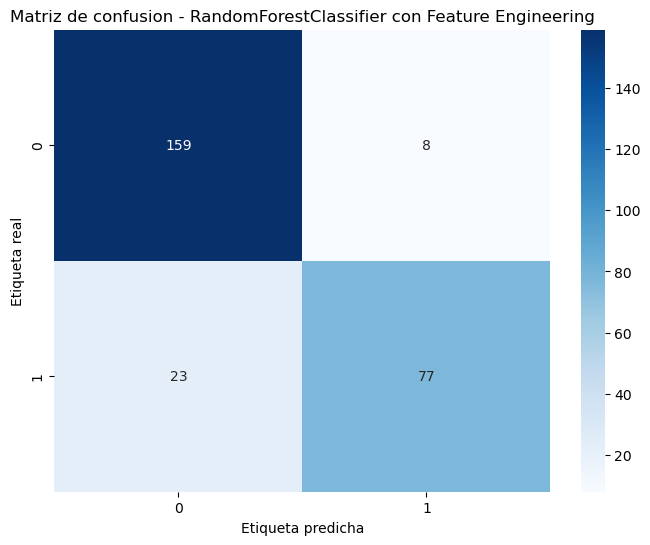

In [453]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - RandomForestClassifier con Feature Engineering")

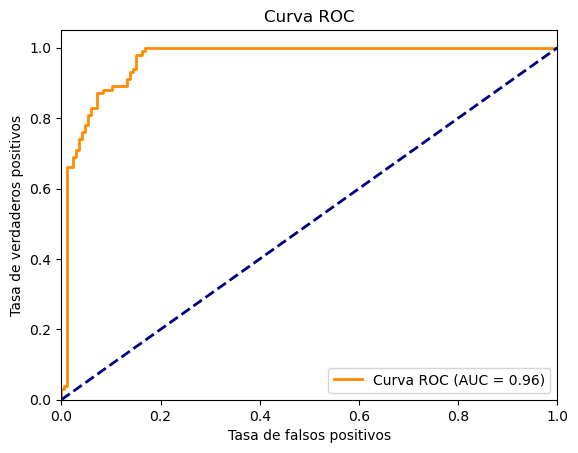

In [454]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_forest_f.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### **Conclusiones**

En este notebook se analizó y realizó predicciones sobre el dataset del titanic. El objetivo principal fue el de comparar el rendimiento del modelo utilizando las columnas del dataset original y el rendimiento del modelo en un dataset modificado aplicando ingenieria de caracteristicas. El modelo utilizado fue el del random forest classifier ya que el objetivo de la predicción era el de predecir si un pasajero sobreviviría o no al naufragio del titanic. Inicialmente, el modelo aplicado al dataset original arrojó un rendimiento bueno, se obtuvo una exactitud de 0.8 y 216 datos fueron etiquetados correctamente, mientras que la curva roc arroja un valor de 0.87. Luego, se procedió a modificar el dataset en una copia y se agregaron columnas que podrian afectar positivamente el rendimiento del modelo. Una de las columnas agregadas fue la de Has_Cabin, una variable binaria que identifica si el pasajero tenia o no una cabina en el barco. Otra variable fue la de Family_Size ya que esta relacionaba la cantidad de personas asociadas a un pasajero. Tambien se agregaron columnas como Evacuation_Priority, que relacionaba la prioridad de evacuacion de las personas considerando que tenian mayor prioridad si eran mujeres y menores de edad. Asi, se aplicó nuevamente el modelo random forest classifier y se obtuvo un rendimiento mayor, ya que la exactitud escaló a 0.88, se tuvo cerca de 236 datos que fueron etiquetados correctamente y la curva roc alcanzó un valor de 0.96. Así, se demuestra que la ingeniería de características es capaz de mejorar considerablemente el rendimiento de un modelo siempre y cuando se elijan crear variables que repercutan en la variable target.